# **Categorization Stars**

This project have goal prediction if one Star is Giant or Dwarfs, used Morgan-Keen (MK) classification system, kinds the learned models are the Classifications. The dataset for this proyect comes from [Kaggle Star](s).




## Setting


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Libraries
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/star-categorization-giants-and-dwarfs/Star99999_raw.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star39552_balanced.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star9999_raw.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star3642_balanced.csv


# Get Data #

The raw data will be processed, apply pre-processing, clean and then Balance.

In [2]:
# Read Data
dataRaw = pd.read_csv('/kaggle/input/star-categorization-giants-and-dwarfs/Star99999_raw.csv') # data initial or Raw 
dataBalanced = pd.read_csv('../input/star-categorization-giants-and-dwarfs/Star39552_balanced.csv') # data pre-processed

#  **Exploratory Data Analysis** 
Information about `dataRaw`, counts of non-null per  columns and its type.

In [3]:
dataRaw.info()  # review types variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


Overall data and convert object to numeric.


In [4]:
dataRaw['Vmag'] = pd.to_numeric(dataRaw['Vmag'] , downcast='float' , errors='coerce')
dataRaw['Plx'] = pd.to_numeric(dataRaw['Plx'] , downcast='float' , errors='coerce')
dataRaw['e_Plx'] = pd.to_numeric(dataRaw['e_Plx'] , downcast='float' , errors='coerce')
dataRaw['B-V'] = pd.to_numeric(dataRaw['B-V'] , downcast='float' , errors='coerce')
dataRaw.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99999.0,49999.000000,28867.369122,0.000000,24999.500,49999.000,74998.500,99998.000000
Vmag,99998.0,8.369750,1.313896,-1.440000,7.640,8.440,9.140,14.080000
Plx,99768.0,7.212467,11.348988,-54.950001,2.510,4.630,8.410,772.330017
e_Plx,99768.0,1.365385,1.816838,0.380000,0.880,1.100,1.390,114.459999
B-V,98871.0,0.704726,0.489679,-0.400000,0.348,0.612,1.075,5.460000


### Missing Values ###

Numbers the missing Values and its percent missing. 

In [5]:
missingValueCount = dataRaw.isnull().sum()
print('Num_null: ' , missingValueCount.sum() )




totalData = np.product(dataRaw.shape)
percentMissing=missingValueCount.sum()/totalData

print('Percentage Missing:', '{: .3%}'.format(percentMissing))
dataRaw.dropna(inplace=True)
dataRaw.fillna(0)
dataRaw = dataRaw.drop(['Unnamed: 0'], axis=1)


Num_null:  4213
Percentage Missing:  0.702%


## Pre-Processing ##

### New Variables

#### Generate four new variables.

- **Amag**    Absolute Magnitude of the Star.
- **e_Amag**  Progation error.
- **eA/A**    Percent error Amag.
- **eP/P**    Percent error.





In [6]:
# New variables

data = dataRaw.copy()
data = data[data.Plx != 0]
data = data.reset_index(drop=True)

data['Amag']   = data['Vmag'] + 5*( np.log10( np.abs( data['Plx'] ) )+ 1 )  # log is ln
data['e_Amag'] = 5*data['e_Plx']/(data['Plx']*np.log(10) )   # propagacion de error

data['eA/A']   = data['e_Amag']/data['Amag']
data['eP/P']   = data['e_Plx']/data['Plx']



###  Target 

The Target `TargetClass ` is give by Classification MK. 

In [7]:
data['TargetClass'] = data['SpType']

data = data.reset_index(drop=True) # reindexar debido al drop


## Target Class: Giants or Dwarfs ##

**TargetClass** - Whether the Star is Dwarf (0) or Giant (1)

In [8]:
# Procesamiento target, clasificar en Giants and dwarfs
for i in range(len(data['TargetClass'])):
    itarget= str( data.loc[i,'TargetClass'] )
    if 'I' in list(itarget): 
        data.loc[i,'TargetClass'] = 1   # 1 giant       
    elif ("VII" or "VI") in list( itarget): 
        data.loc[i,'TargetClass'] = 0 # VII is Dwarf (0)
    elif "V" in list( itarget): 
        if ('G' or 'K' or 'M' or 'L' or 'T') in  list(itarget):
            data.loc[i,'TargetClass'] = 0
        else:
            data.loc[i,'TargetClass'] = 9
    else: 
        data.loc[i,'TargetClass'] = 9 # None
        

<AxesSubplot:xlabel='TargetClass', ylabel='count'>

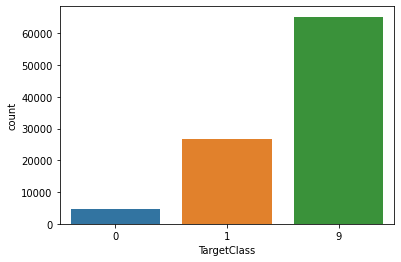

In [9]:
sns.countplot(x="TargetClass", data=data )

In [10]:
data['TargetClass'].value_counts()

9    65279
1    26647
0     4781
Name: TargetClass, dtype: int64

### Selection only Giants or Dwarfs ###

Copy and drop number 9.


In [11]:
df = data[data.TargetClass != 9 ] # != return  boolean

## Balance

In this section, we make balance the `dataRAw` based in [Imbalanced Classes](https://elitedatascience.com/imbalanced-classes). The above have goal of equilibrium  target in order  to avoid bias.

In [12]:
# dividir set 

dfGiants = df[df.TargetClass == 1]
dfDwarfs = df[df.TargetClass == 0]
num_of_giant = dfGiants.shape[0]
num_of_dwarf = dfDwarfs.shape[0]

from sklearn.utils import resample
dfGiantsDownSample = resample(dfGiants, 
                             replace = False, # sample without replacement
                             n_samples = num_of_dwarf,
                             random_state =1 
                             )
dfDownSampled = pd.concat([dfGiantsDownSample , dfDwarfs] )
dfDownSampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9562 entries, 27343 to 96675
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9562 non-null   float32
 1   Plx          9562 non-null   float32
 2   e_Plx        9562 non-null   float32
 3   B-V          9562 non-null   float32
 4   SpType       9562 non-null   object 
 5   Amag         9562 non-null   float32
 6   e_Amag       9562 non-null   float32
 7   eA/A         9562 non-null   float32
 8   eP/P         9562 non-null   float32
 9   TargetClass  9562 non-null   object 
dtypes: float32(8), object(2)
memory usage: 522.9+ KB


1    4781
0    4781
Name: TargetClass, dtype: int64


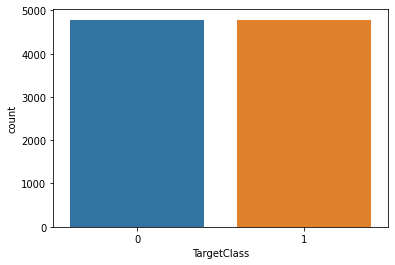

In [13]:
sns.countplot(x='TargetClass', data=dfDownSampled)
print( dfDownSampled['TargetClass'].value_counts())

In [14]:
dfBalanced= dfDownSampled.reset_index(drop=True)

dataStar = dfBalanced.sample(frac=1).reset_index(drop=True) # shuffle

dataStar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9562 non-null   float32
 1   Plx          9562 non-null   float32
 2   e_Plx        9562 non-null   float32
 3   B-V          9562 non-null   float32
 4   SpType       9562 non-null   object 
 5   Amag         9562 non-null   float32
 6   e_Amag       9562 non-null   float32
 7   eA/A         9562 non-null   float32
 8   eP/P         9562 non-null   float32
 9   TargetClass  9562 non-null   object 
dtypes: float32(8), object(2)
memory usage: 448.3+ KB


# **Visualization** ##

### Histogram Graph

Here, we have one Histogram per each variable (columns), in this way,  we see the distribution of these variable.

array([[<AxesSubplot:title={'center':'Vmag'}>,
        <AxesSubplot:title={'center':'Plx'}>,
        <AxesSubplot:title={'center':'e_Plx'}>],
       [<AxesSubplot:title={'center':'B-V'}>,
        <AxesSubplot:title={'center':'Amag'}>,
        <AxesSubplot:title={'center':'e_Amag'}>],
       [<AxesSubplot:title={'center':'eA/A'}>,
        <AxesSubplot:title={'center':'eP/P'}>,
        <AxesSubplot:title={'center':'TargetClass'}>]], dtype=object)

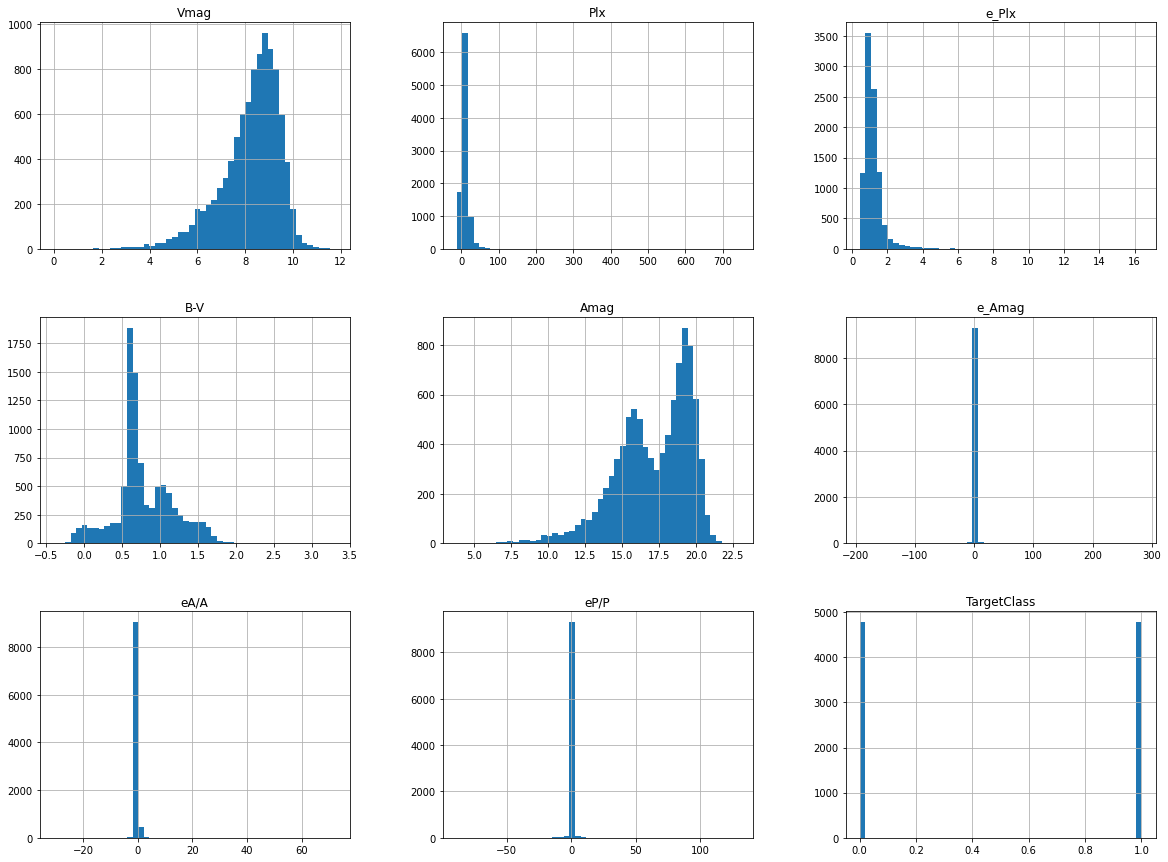

In [15]:
%matplotlib inline

dataStar['TargetClass'] = pd.to_numeric(dataStar['TargetClass'] , downcast='float' , errors='coerce')
dataStar.dropna(inplace=True)


dataStar.hist(bins=50 , figsize=(20,15) ) # histogram

### Scatter Graph

The next  two graphs show relationship among quantities most relevant for determinar Categorization Star.

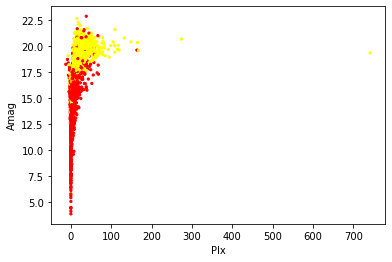

In [16]:
#sns.set()
colors = {1:'red', 0:'yellow'}
dataStar.plot.scatter( x="Plx" ,y="Amag" ,  c=dataStar['TargetClass'].map(colors) ,s=5); # problem with TargetClass
#plt.xlabel("Plx")
#plt.figure()
#plt.show()

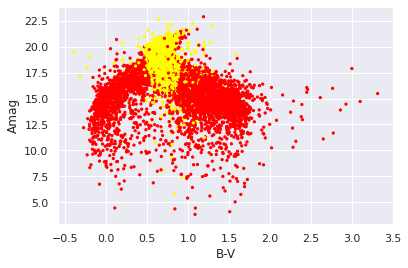

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline
sns.set()
dataStar.plot.scatter( x="B-V" ,y="Amag",cmap='viridis' ,  c=dataStar['TargetClass'].map(colors) ,s=5); # problem with TargetClass
plt.xlabel("B-V")
plt.figure()
plt.show()



### Scatter Attributes

In this vizualization we see the dispersion for each variable and target with respect a other variable.

array([[<AxesSubplot:xlabel='TargetClass', ylabel='TargetClass'>,
        <AxesSubplot:xlabel='Amag', ylabel='TargetClass'>,
        <AxesSubplot:xlabel='Vmag', ylabel='TargetClass'>,
        <AxesSubplot:xlabel='Plx', ylabel='TargetClass'>,
        <AxesSubplot:xlabel='B-V', ylabel='TargetClass'>],
       [<AxesSubplot:xlabel='TargetClass', ylabel='Amag'>,
        <AxesSubplot:xlabel='Amag', ylabel='Amag'>,
        <AxesSubplot:xlabel='Vmag', ylabel='Amag'>,
        <AxesSubplot:xlabel='Plx', ylabel='Amag'>,
        <AxesSubplot:xlabel='B-V', ylabel='Amag'>],
       [<AxesSubplot:xlabel='TargetClass', ylabel='Vmag'>,
        <AxesSubplot:xlabel='Amag', ylabel='Vmag'>,
        <AxesSubplot:xlabel='Vmag', ylabel='Vmag'>,
        <AxesSubplot:xlabel='Plx', ylabel='Vmag'>,
        <AxesSubplot:xlabel='B-V', ylabel='Vmag'>],
       [<AxesSubplot:xlabel='TargetClass', ylabel='Plx'>,
        <AxesSubplot:xlabel='Amag', ylabel='Plx'>,
        <AxesSubplot:xlabel='Vmag', ylabel='Plx'>,
       

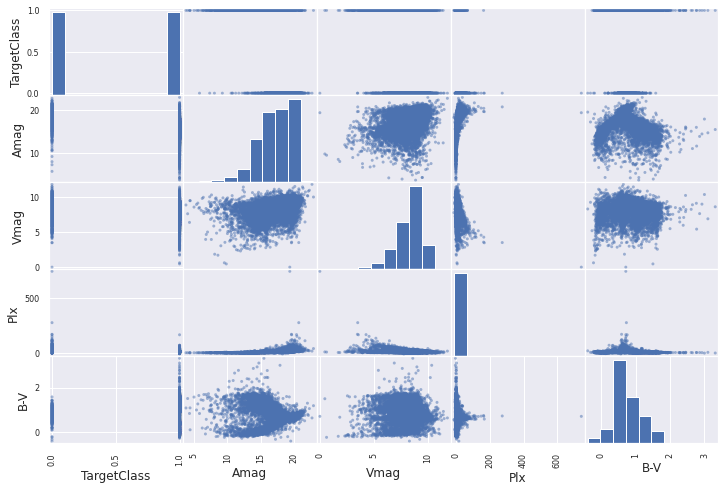

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['TargetClass','Amag' , 'Vmag' , 'Plx' , 'B-V']

# convert a numerical Targetclass 
dataStar['TargetClass'] = pd.to_numeric(dataStar['TargetClass'] , downcast='float' , errors='coerce')

scatter_matrix(dataStar[attributes] , figsize=(12, 8))


## Correlation Linear ##

In this part, we show the correlation the `TargetClass` with each other variables.

In [19]:
corr_matrix = dataStar.corr()
corr_matrix["TargetClass"].sort_values(ascending=False)

TargetClass    1.000000
B-V            0.302299
eP/P           0.036399
e_Amag         0.036399
eA/A           0.023408
e_Plx         -0.242699
Plx           -0.365910
Vmag          -0.381619
Amag          -0.735124
Name: TargetClass, dtype: float64

## Data Cleaning ##

In [20]:
#dataStar = dataStar.drop(['Unnamed: 0'], axis =1)
dataStar = dataStar.drop(['SpType'], axis =1)



# **Data Processing** #

In [21]:
dataStar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9562 entries, 0 to 9561
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9562 non-null   float32
 1   Plx          9562 non-null   float32
 2   e_Plx        9562 non-null   float32
 3   B-V          9562 non-null   float32
 4   Amag         9562 non-null   float32
 5   e_Amag       9562 non-null   float32
 6   eA/A         9562 non-null   float32
 7   eP/P         9562 non-null   float32
 8   TargetClass  9562 non-null   float32
dtypes: float32(9)
memory usage: 410.9 KB


### Train and test Set ###

The data is split two set, Train and test, in one  proportional of 80% and 20%, respectively.

In [22]:
from sklearn.model_selection import train_test_split


train , test = train_test_split(dataStar , test_size = 0.2, random_state = 42 )
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [23]:
## Stratified ##
#from sklearn.model_selection import StratifiedShuffleSplit
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in split.split(data, data["variableStratificada"]):
#strat_train_set = housing.loc[train_index]
#strat_test_set = housing.loc[test_index]

#from  sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='median')

#from  sklearn.preprocessing import OneHotEncoder
#catEncoder = OneHotEncoder()

## numerical ##
#from  sklearn.pipeline import Pipeline
#from  sklearn.preprocessing import StandardScaler
#numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', CombinedAttributesAdder()),])
# new_variable_transformed_numerical = num_pipeline.fit_transform(varible_numerica)

## numerical and categorial ##
#from sklearn import ColumnTransformer
#numerical_attribs = list(numerical_columns)
#categorical_attribs = list(categorial_columns)
#full_pipeline = ColumnTransformer([("num", numerical_pipeline, numerical_attribs),("cat", OneHotEncoder(), categorical_attribs),])
#dataTotal_prepared = full_pipeline.fit_transform(dataTotal) 

## Target ## 

The Target corresponds to type the Star, be it Giant(1) or Dwarf(0).

In [24]:
trainX = train.drop('TargetClass', axis=1)
trainY = train['TargetClass'].copy()

testX = test.drop('TargetClass', axis=1)
testY = test['TargetClass'].copy()
trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    7649 non-null   float32
 1   Plx     7649 non-null   float32
 2   e_Plx   7649 non-null   float32
 3   B-V     7649 non-null   float32
 4   Amag    7649 non-null   float32
 5   e_Amag  7649 non-null   float32
 6   eA/A    7649 non-null   float32
 7   eP/P    7649 non-null   float32
dtypes: float32(8)
memory usage: 239.2 KB


# Featuring Engineering 

##  Pipeline and Featuring Scaling ##

For the  Featuring Scaling, we was used `StandardScaler`that find to get a unit variance on each  the data distribution.

In [25]:
from  sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder

from  sklearn.pipeline import Pipeline
from  sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                              ('std_scaler', StandardScaler())] )

from sklearn.compose import ColumnTransformer

num_attribs = list(trainX)
#cat_attribs = ["ocean_proximity"] ---generar lista de attribus catecorial---
full_pipeline = ColumnTransformer([("num", numerical_pipeline, num_attribs),
#                                   ("cat", OneHotEncoder(), cat_attribs),
                                  ])

Xtrain = full_pipeline.fit_transform(trainX)  # array

print('Done')

Done


 # **MODEL** # 

The applied classification models are:

- Logistic Regression 
- Random Forest Classifier
- Stochastic Gradient Descent

In [26]:
# Models ==> ['logisRegre' , 'SVM'   , 'SGDClf' ,  'randomForestClassifier' , 'navieBayes']

# Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [27]:

SGDClf = SGDClassifier(random_state=42)
SGDClf.fit(Xtrain, trainY) # fit equal training

LRClf = LogisticRegression(random_state=0)
RFClf = RandomForestClassifier(random_state=0)
SVClf = LinearSVC(random_state=0)


#SGDClf.fit(Xtrain, trainY)

## Cross-Validation ##

In the order to optimize,  we created a function `compareModels` that compare the different models apply cross-validation. The scoring choose is negative mean squared error. 

In [28]:
from sklearn.model_selection import cross_val_score

# automatizar entre diversos modelos de la misma categoria
def compareModels(models, x, y, numCV, scoringT="f1_micro"):
    modelsCV = dict()
    for mod in models:
        scores = cross_val_score(mod, x, y, scoring = scoringT, cv=numCV)
        meanScore = scores.mean()
        modelsCV[meanScore] = mod
    
    val=max(modelsCV)
    bestModel = modelsCV[val]
    return modelsCV,bestModel
    
result, model =compareModels([SGDClf , LRClf, RFClf] , Xtrain , trainY , 6)
print(result); print('\n'); print('Best model:', model); 

{0.9070478447789373: SGDClassifier(random_state=42), 0.9129301977201139: LogisticRegression(random_state=0), 0.9386846020459467: RandomForestClassifier(random_state=0)}


Best model: RandomForestClassifier(random_state=0)


In [29]:
model.fit(Xtrain, trainY)

Xtest = full_pipeline.fit_transform(testX)
Ypredicts = model.predict(Xtest)


# Metrics

The Metrics is Root Mean Squared Error that  allows us to measure the error  between value the test set and value predict.

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testY , Ypredicts) 
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.2408818


While the precision is:

In [31]:
output = pd.DataFrame({'Star': testY, 'StarPred': Ypredicts})

def precision(a, b):
    cont = 0
    for i in np.arange(len(a)):
        if (a[i]==b[i]):
            cont = cont +1
             
            
    return  format( cont/len(a) , '2%') 

print('Precision:',  precision(testY , Ypredicts))

Precision: 94.197595%


In [32]:
### stratified CV ### see pag 136  Geron's book
#from sklearn.model_selection import StratifiedKFold
#from sklearn.base import clone
#skfolds = StratifiedKFold(n_splits=3, random_state=42)

# **Refinament** #

### Hyper-parameters ###

We proceeded to search for the hyperparameters, using `GridSearchCV` a list of hyperparameters to experiment with.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


#distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2','l1'])
#clf=RandomizedSearchCV( RFClf , distributions , random_state=0) # arg (model , distri , ...)


parameter_grid = [{'n_estimators':[3,5,10,12, 14,16], 'max_features':[2,4,6]} ,
                  {'bootstrap':[False], 'n_estimators':[3,7,12,14, 16] , 'max_features':[1,2,3,4, 6]}]
#clf=GridSearchCV( model , parameter_grid,
#                cv=20 ,  scoring='neg_mean_squared_error' , return_train_score=True) # arg (model , distri , ...)

In [34]:
randomgrid = {'n_estimators':[ 300, 700, 900], 
                'max_features':["sqrt", 'log2'] ,
               'criterion' : ["entropy", "gini"],
               'bootstrap':[False, True], 
             }

clf=RandomizedSearchCV( model ,
                       randomgrid,
                       cv=10,
                       scoring='f1_micro' , 
                       return_train_score=True) # arg (model , distri , ...)

In [35]:

clf.fit(Xtrain, trainY)

clf.best_params_

{'n_estimators': 300,
 'max_features': 'log2',
 'criterion': 'entropy',
 'bootstrap': True}

###  Model-Hyperparameters ###

In [36]:
finalModel=clf.best_estimator_
Ypredfinal=finalModel.predict(Xtest)

print('Precision:', precision(testY , Ypredfinal) )# worse model

Precision: 94.302143%


In [37]:
from sklearn.metrics import  f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,  SCORERS


score = f1_score(
    testY,
    Ypredfinal,
 #   labels=labels,
    average='micro',
)

print("Score F1:" , score)

Score F1: 0.9430214323052797


[[930  54]
 [ 55 874]]


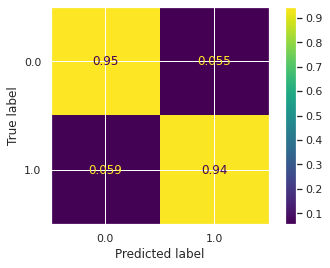

In [38]:
labels= finalModel.classes_


cmat = confusion_matrix(
    testY,
    Ypredfinal,
    labels=labels,
    #average='micro',

)

print(cmat)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize


disp = ConfusionMatrixDisplay(confusion_matrix=cmat,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

# Future improvements

The model  can be improvement by implementation some  Clusters model and  applying a stratification to the data.

In [39]:
# **Deploy** #